# Assignment 2
### Understanding Uncertainty
### Due 9/12

1. 'State Bottle Retail' is the price at which the bottle is sold, while 'State Bottle Cost' is the price the state pays for a bottle.
- How do you define the most profitable item? Why? Explain your thinking.
    There are many different ways to define the profitability of an item. You can think of it in terms of how many of that item are sold, the price revenue, the quatity sold per fluid oz of the drink (for example comparing a 2 ox shooter may be difference from a keg of beer). In my analysis I will look into the most profitable liqours in Iowa based on amount of gross revenue.
- Use `.groupby` calculations to determine the most profitable liquors sold in Iowa.
- Make a plot of the top liquors.

In [21]:
import pandas as pd
import os
path = os.getcwd()
path # = \\ in downloads
os.chdir(r"C:\Users\Jillian Howe\Documents\UVA_MSDS\understanding_uncertainty\data")
path2 = os.getcwd()
path2

'C:\\Users\\Jillian Howe\\Documents\\UVA_MSDS\\understanding_uncertainty\\data'

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt

data exploration and figuring out what I wanna do

In [2]:
iowa = pd.read_csv('iowa.csv')
iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars)
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00


In [3]:
iowa["Sales Diff"] = iowa["State Bottle Retail"] - iowa["State Bottle Cost"]
iowa.head()

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Sales Diff
0,INV-59108400026,06/06/2023,3723,J D SPIRITS LIQUOR,51040,STRAIGHT RYE WHISKIES,INFINIUM SPIRITS,27102,TEMPLETON RYE 4YR,750,18.09,27.14,2,54.28,9.05
1,S16879800057,01/16/2014,3926,LIQUOR DOWNTOWN / IOWA CITY,52240,VODKA 80 PROOF,HEAVEN HILL BRANDS,35416,BURNETT'S VODKA 80 PRF,750,4.84,7.26,12,87.12,2.42
2,INV-05301100019,06/05/2017,3829,GARY'S FOODS / MT VERNON,52314,CANADIAN WHISKIES,DIAGEO AMERICAS,11296,CROWN ROYAL,750,15.59,23.39,6,135.66,7.80
3,INV-40973500083,10/14/2021,5102,WILKIE LIQUORS,52314,AMERICAN SCHNAPPS,JIM BEAM BRANDS,82787,DEKUYPER BUTTERSHOTS,1000,7.87,11.81,12,141.72,3.94
4,INV-17022500013,01/18/2019,2560,HY-VEE FOOD STORE / MARION,52302,WHISKEY LIQUEUR,SAZERAC COMPANY INC,64863,FIREBALL CINNAMON WHISKEY,200,2.50,3.75,12,45.00,1.25


In [4]:
iowa.describe()
iowa.shape

(159904, 15)

In [5]:
iowa["Item Number"].nunique()
iowa["Item Number"].value_counts()

Item Number
11788     1561
36308     1442
64858      970
38176      950
36904      947
          ... 
988482       1
986503       1
33303        1
66242        1
100827       1
Name: count, Length: 5621, dtype: int64

In [6]:
iowa[iowa['Item Description'] == 'BLACK VELVET']

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Sales Diff
20,S28830400006,11/03/2015,4661,QUIK TRIP #531 / GRIMES,50111,CANADIAN WHISKIES,"CONSTELLATION WINE COMPANY, INC.",11776,BLACK VELVET,750,5.23,7.85,12,94.20,2.62
86,INV-29527800015,08/17/2020,4495,CASEY'S GENERAL STORE #3055 / GRUNDY CENTER,50638,CANADIAN WHISKIES,HEAVEN HILL BRANDS,11774,BLACK VELVET,375,3.07,4.61,6,27.66,1.54
110,S10053200001,01/15/2013,4347,JEFF'S MARKET / BLUE GRASS,52726,CANADIAN WHISKIES,"CONSTELLATION WINE COMPANY, INC.",11788,BLACK VELVET,1750,10.45,15.67,6,94.02,5.22
130,INV-23294500008,11/18/2019,4284,FAREWAY STORES #559 / IOWA FALLS,50126,CANADIAN WHISKIES,HEAVEN HILL BRANDS,11788,BLACK VELVET,1750,10.45,15.68,30,470.40,5.23
138,S15793600011,11/19/2013,4239,FAREWAY STORES #850 / SPIRIT LAKE,51360,CANADIAN WHISKIES,"CONSTELLATION WINE COMPANY, INC.",11776,BLACK VELVET,750,4.83,7.44,12,89.28,2.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159648,INV-06127300001,07/17/2017,4256,FAREWAY STORES #912 / SIOUX CENTER,51250,CANADIAN WHISKIES,CONSTELLATION BRANDS INC,11788,BLACK VELVET,1750,10.45,15.68,552,8655.36,5.23
159686,INV-13480400158,07/26/2018,2648,HY-VEE #4 / WDM,50265,CANADIAN WHISKIES,CONSTELLATION BRANDS INC,11788,BLACK VELVET,1750,10.45,15.68,30,470.40,5.23
159752,INV-74731200003,09/27/2024,2607,HY-VEE WINE AND SPIRITS / SHENANDOAH,51601,CANADIAN WHISKIES,HEAVEN HILL BRANDS,11788,BLACK VELVET,1750,11.50,17.25,12,207.00,5.75
159808,INV-60955100010,08/04/2023,6082,CASEY'S #2654 / STUART,50250,CANADIAN WHISKIES,HEAVEN HILL BRANDS,11788,BLACK VELVET,1750,11.00,16.50,6,99.00,5.50


In [7]:
iowa[["Item Description", "Item Number"]].nunique()

Item Description    5401
Item Number         5621
dtype: int64

In [8]:
iowa['Item Description'].value_counts()

Item Description
BLACK VELVET                          3994
HAWKEYE VODKA                         3460
TITOS HANDMADE VODKA                  2648
FIREBALL CINNAMON WHISKEY             2500
FIVE O'CLOCK VODKA                    2013
                                      ... 
HENDRICKS W/CUCUMBER CURLER              1
DON JULIO 3X375ML                        1
HA ELIJAH CRAIG 18YR SINGLE BARREL       1
PRICHARDS PRALINE CREAM LIQUEUR          1
THREE OLIVES PURPLE VODKA                1
Name: count, Length: 5401, dtype: int64

please note in the code below I tried to fix find a list of how much each bottle's revenue was by using bottles retail - cost and plotting the result by grouping by the item number (as it is the "best" -in my opinion - data with refertiality (im trying to treat it as a key))

In [9]:
sales = iowa.groupby("Item Number").sum()
sales = sales.sort_values(by='Sales Diff',ascending=False)
sales

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Sales Diff
Item Number,,,,,,,,,,,,,,
64858,INV-22153600014S24943800005INV-36693600001INV-...,09/26/201904/07/201505/17/202107/13/202111/16/...,4379716,KUM & GO #227 / AMESKWIK SHOP #527 / COUNCIL B...,5001051501504755011250266523275026650323503235...,WHISKEY LIQUEURWHISKEY LIQUEURWHISKEY LIQUEURW...,"SAZERAC COMPANY INCSAZERAC CO., INC.SAZERAC C...",FIREBALL CINNAMON WHISKEY MINI DISPENSERFIREBA...,1423200,27546.84,41320.26,2537,108513.90,13773.42
11788,S10053200001INV-23294500008INV-27039800022INV-...,01/15/201311/18/201905/05/202009/17/202101/17/...,6859402,JEFF'S MARKET / BLUE GRASSFAREWAY STORES #559 ...,5272650126506135205250325512475015851360526415...,CANADIAN WHISKIESCANADIAN WHISKIESCANADIAN WHI...,"CONSTELLATION WINE COMPANY, INC.HEAVEN HILL BR...",BLACK VELVETBLACK VELVETBLACK VELVETBLACK VELV...,2731750,16390.30,24673.70,35970,563812.80,8283.40
38178,INV-77359200008INV-12179900155INV-24536900012I...,12/09/202405/21/201801/14/202011/15/202104/05/...,3445711,BROTHERS MARKET / GRUNDY CENTERLUCKY MARTFAM...,5063850112528045234050265507025235352246525655...,AMERICAN VODKASAMERICAN VODKASAMERICAN VODKASA...,FIFTH GENERATION INCFIFTH GENERATION INCFIFTH ...,TITOS HANDMADE VODKATITOS HANDMADE VODKATITOS ...,1363250,14772.15,22158.25,15954,452920.03,7386.10
88296,INV-75565500008S04411200010INV-81837400034INV-...,10/21/202403/07/201204/22/202510/14/202106/13/...,1865750,HY-VEE WINE & SPIRITS / MUSCATINEKUM & GO #713...,5276152601502735042852057503145040150322520015...,100% AGAVE TEQUILATEQUILA100% AGAVE TEQUILA100...,BACARDI USA INCTHE PATRON SPIRITS COMPANYBACAR...,PATRON SILVERPATRON TEQUILA SILVERPATRON SILVE...,340500,12416.74,18625.34,5981,245889.66,6208.60
11298,S12044900009INV-58315200003INV-32125400006S207...,05/06/201305/10/202311/20/202008/20/201403/12/...,1298435,WAL-MART 1435 / CRESTONWAL-MART 1393 / OSKALOO...,5080152577500225250152501515015260152342525375...,CANADIAN WHISKIESCANADIAN WHISKIESCANADIAN WHI...,DIAGEO AMERICASDIAGEO AMERICASDIAGEO AMERICASD...,CROWN ROYAL CANADIAN WHISKYCROWN ROYALCROWN RO...,581000,10790.73,16186.93,2501,122340.49,5396.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36973,S26413100007,06/25/2015,4638,GD XPRESS / DAVENPORT,52804,VODKA 80 PROOF,"SAZERAC CO., INC.",NIKOLAI VODKA,200,1.13,1.70,48,81.60,0.57
902407,S10103200001,01/17/2013,4612,ATC LIQUOR,52802,AMERICAN GRAPE BRANDIES,E AND J GALLO WINERY,E & J VSOP,100,0.99,1.49,48,71.52,0.50
40591,INV-24258200013,12/30/2019,3715,KIMBERLY MART / DAVENPORT,52807,AMERICAN FLAVORED VODKA,E & J GALLO WINERY,NEW AMSTERDAM PEACH,100,1.00,1.50,48,72.00,0.50


In [ ]:
sales_by_diff = iowa.groupby("Item Number")["Sales Diff"].mean()
top_sales = sales[:20]
sales_by_diff 
sales_df = sales_by_diff.reset_index()
sales_df
#make barplot of sales by diff
# ns.barplot(sales_df, x = "Item Number", y = "Sales Diff", orient="h")
#plt.show()

SyntaxError: positional argument follows keyword argument (3995958537.py, line 7)

Text(0, 0.5, 'Item Number')

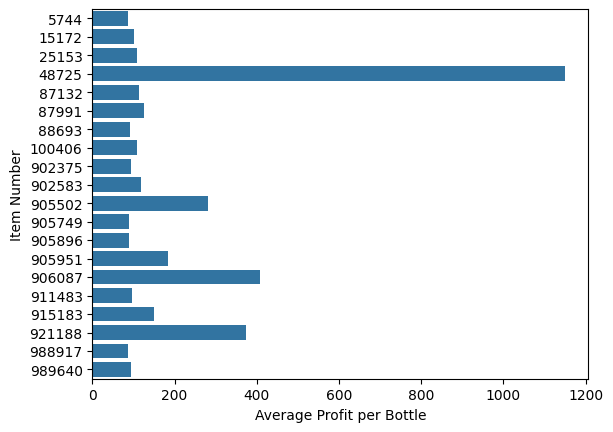

In [ ]:
#this code is modified from the class example
sales = (iowa.loc[:,['Sales Diff','Item Number']] 
         .groupby('Item Number')
         .mean() #hypotherically i shouldnt have to take the mean but my code above was giving me an error so here we are
         .sort_values(by='Sales Diff',ascending=False) )
top_sales = sales[:20]
sns.barplot(top_sales['Sales Diff'], orient='h')#, order=top_sales.sort_values('Item Number').index) ##WHWYYY CANT I GET THIS TO ORDER
plt.title("top 20 most profit per item in Iowa liquor sales")

In [ ]:
iowa[iowa["Item Number" ] == 48725] #most profit per sale - not necessarily most popular bottle ;)
#not best way of showing this but it works for what I am trying to do.

,Invoice/Item Number,Date,Store Number,Store Name,Zip Code,Category Name,Vendor Name,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Sales Diff
73537,INV-70066800001,05/10/2024,5916,ANOTHER ROUND / DEWITT,52742,IMPORTED BRANDIES,REMY COINTREAU USA INC,48725,REMY MARTIN LOUIS XIII,750,2298.84,3448.26,1,3448.26,1149.42


2. This question is to further explore broadcasting in NumPy.

- In the first code chunk below, there are two vectors, $x$ and $y$. What happens when you try to subtract them?
    -  The error "ValueError: operands could not be broadcast together with shapes (3,) (2,)" is thrown because the two arrays do not have the same shape
- Instead, try `x.reshape(-1,1)-y.reshape(1,-1)`. What do you get?
    - This made a 3x2 array. It subtracted x from y in each column of x.
- Try `x.reshape(1,-1)-y.reshape(-1,1)`. Compare the results to your previous answer.
    - This made rows of array x and subtracted the first element of y in the first and the second element to the second row. it formed a 2x3.
- Write two double for-loops to replicate the results of the previous two answers. 
- Clearly explain how `x.reshape(1,-1)` and `x.reshape(-1,1)` change $x$
    - .reshape make a 2d array that copies the values in the x array by the magnitude of the values specified within the parentheis. where 1 is x array x 1 and -1 is x array but making the rows columns.

In [146]:
import numpy as np

x = np.array([1,3,5])
y = np.array([2,5])

In [71]:
x-y

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [78]:
z1 = x.reshape(-1,1)-y.reshape(1,-1)
z1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [77]:
z2 = x.reshape(1,-1)-y.reshape(-1,1)
z2

array([[-1,  1,  3],
       [-4, -2,  0]])

In [135]:
x3 = np.array([x,-x])
x3

array([[ 1,  3,  5],
       [-1, -3, -5]])

In [172]:
x3[1][0]
x1 = (np.array([x,x])).T
x1.shape

(3, 2)

In [173]:
x1 = (np.array([x,x])).T
for i in range(len(x)):    
        for j in range(len(y)):
                x1[i][j] = (x1[i][j]-y[j])     
x1

array([[-1, -4],
       [ 1, -2],
       [ 3,  0]])

In [155]:
x1 = np.array([x,x])
for i in range(len(x)):    
        for j in range(len(y)):
                x1[j][i] = (x1[j][i]-y[j])   
x1

array([[-1,  1,  3],
       [-4, -2,  0]])

3. The indicator function $\mathbb{I}\{ x \le z \}$ takes the value 0 if $x>z$ and 1 if $x \le z$ is true, or
$$
\mathbb{I}\{x \le z\} = \begin{cases}
0, &x > z \\
1, &x \le z
\end{cases}
$$

- For $x = 3$, plot the indicator function for any $z$
- Explain how $ 1- \mathbb{I}\{ x \le z \} = \mathbb{I}\{ x > z \}$. Drawing a plot might help, or looking at the definition given above.
- The code below generates a random sample for different numbers of observations, $N = 3, 30, 300, 3000 $. Write a function to compute the ECDF curve for each sample, and plot your results.
- Describe in your own words what happens to the ECDF qualitatively as the sample size $N$ increases

[ 0.32557447 -0.68911772 -0.01982181  0.47475325 -1.93110142]
[-1.93110142 -0.68911772 -0.01982181  0.32557447  0.47475325]
(array([0.2, 0.4, 0.6, 0.8, 1. ]), array([-1.93110142, -0.68911772, -0.01982181,  0.32557447,  0.47475325]))


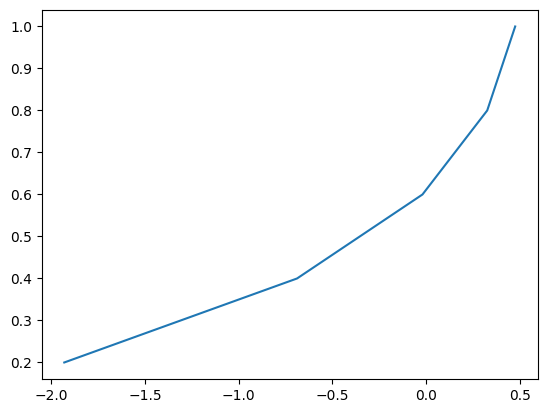

In [ ]:
import numpy as np
import seaborn as sns

rng = np.random.default_rng(100)
#x = 3

for N in (3,30,300,3000):
    X = rng.normal(0,1,5)
#print(X)

#ECDF plot goes her

def ecdf(x, plot = True):
    grid = np.sort(np.unique(X))
    print(grid)
    ecdf = np.zeros(len(grid))

    for idx in range(len(grid)):
        ecdf[idx] = (X <= grid[idx]).sum()/len(X)
    if plot:
        plt.plot(grid, ecdf)

    return ecdf, grid
print(ecdf(X))

#Grace helped me to understand the ECDF and the code listed above.

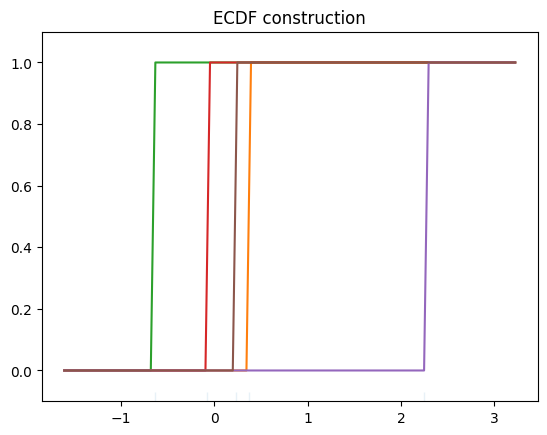

<Axes: >

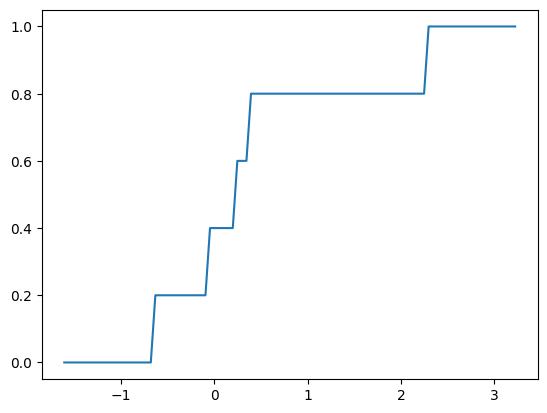

In [76]:
x = rng.normal(0,1,5)

grid = np.linspace(x.min()-x.std(), x.max()+x.std(), 100) # Create a grid
ecdf = 0*grid.copy() # Create a space for values

def indicate(x,grid): 
    ''' Indicator function for computing ECDFs. '''
    return x <= grid

fig = sns.rugplot(x,alpha=.1)
fig.set(title='ECDF construction')
for i in range(len(x)):
    F_i = indicate(x[i],grid)
    sns.lineplot(x=grid,y=F_i)
    ecdf += F_i
plt.show()    

ecdf = ecdf/len(x)
sns.lineplot(x=grid, y=ecdf)

4. A **quantile** generalizes the concept of the median so that instead of 50% of the mass below and 50% above, the $q$-quantile is the value for which $q$ proportion of the data are below that value and $(1-q)$ proportion of the data are above that value. This is a concept of **order**.

- Write a function that computes any quantile without using Numpy's `np.quantile`
- Write a function that computes the **Interquartile Range (IQR)** -- the .25 quantile and the .75 quantile, which brackets 50% of the data -- and the **whiskers**: $\pm 1.5 \times \text{IQR}$ from the edges of the IQR
- Write a function that computes a five-number summary and values for a boxplot: the minimum, the .25 quantile, the median, the .75 quantile, and the maximum, and the whiskers
- Anything outside the whiskers is an **outlier**; write a function that returns a Boolean vector indicating if the observations are outliers.
- For a numeric variable of your choice from one of the datasets, apply your functions from above, and compare your answers with `sns.boxplot` and `df.describe`. 

In [28]:
#median  = np.median(X)
#quartile1 = np.median(X[X<=median])
#quartile3 = np.median(X[X>=median])
#IQR = quartile3 - quartile1
#if we dont have the median function
def median_func(X):
    X = np.sort(X)
    n = len(X)
    if n % 2 == 0:
        median = (X[n//2 - 1] + X[n//2]) / 2
    else:
        median = X[n//2]
    return median

def fivenumsum(X):
    median  = median_func(X)
    quartile1 = median_func(X[X<=median])
    quartile3 = median_func(X[X>=median])
    IQR = quartile3 - quartile1
    max = np.max(X)
    min = np.min(X)
    lower_wisker = quartile1 - 1.5*IQR
    upper_wisker = quartile3 + 1.5*IQR
    fivenumsumans = print(" min:", round(min, 2), "\n", "quartile1:", round(quartile1, 2), "\n", "median:", round(median, 2), "\n", "quartile3:", round(quartile3, 2), "\n", "max:", round(max,2), "\n", "lower_wisker:", round(lower_wisker,2), "\n", "upper_wisker:", round(upper_wisker, 2) )
    return (fivenumsumans)

fivenumsum(X)


 min: -2.92 
 quartile1: -0.64 
 median: 0.03 
 quartile3: 0.71 
 max: 3.57 
 lower_wisker: -2.67 
 upper_wisker: 2.74


In [23]:
liquor = pd.read_csv('iowa.csv')
liquor.head()
liquor.columns

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Zip Code',
       'Category Name', 'Vendor Name', 'Item Number', 'Item Description',
       'Bottle Volume (ml)', 'State Bottle Cost', 'State Bottle Retail',
       'Bottles Sold', 'Sale (Dollars)'],
      dtype='object')

In [29]:
fivenumsum(liquor["State Bottle Retail" ])
liquor["State Bottle Retail" ].describe()

 min: 0.0 
 quartile1: 8.67 
 median: 12.99 
 quartile3: 19.82 
 max: 3448.26 
 lower_wisker: -8.06 
 upper_wisker: 36.54


count    159904.000000
mean         16.480350
std          17.099067
min           0.000000
25%           8.670000
50%          12.990000
75%          19.920000
max        3448.260000
Name: State Bottle Retail, dtype: float64

5. The kernel density estimator captures the concentration of the data around various points, and is defined as
$$
\hat{f}_{N,h}(z) = \frac{1}{N} \sum_{i=1}^N \frac{1}{h} k \left( \frac{x_i - z}{h}\right)
$$
where $h$ is the bandwidth and $k()$ is one of the kernel functions from the class materials (Gaussian, Epanechnikov, uniform, triangular).

- Write a function that takes the bandwidth $h$ as given, and computes and plots $\hat{f}_{N,h}(z)$, for the kernels listed in the slides
- Write a function that computes the plug-in bandwidth
- Use your functions to analyze some numeric variables from a dataset of your choice, using a variety of bandwidths
- Compare bandwidths that are greater or less than the plug-in value with the results for the plug-in value. When does the KDE appear to be overfitting? Underfitting?

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#my attempt
def kerneldesityest(bandwidth, kernelfunc, N):
    summation = 0
    for i in range(len(N)):
        mini = kernelfunc * ((N(i) - kernelfunc(i))/ bandwidth)
        summation += mini
    est = (1/bandwidth) * summation

    return est

In [48]:
z = liquor["Bottles Sold"]
x.describe()

count    159904.000000
mean         10.883336
std          28.042635
min         -60.000000
25%           3.000000
50%           6.000000
75%          12.000000
max        2400.000000
Name: Bottles Sold, dtype: float64

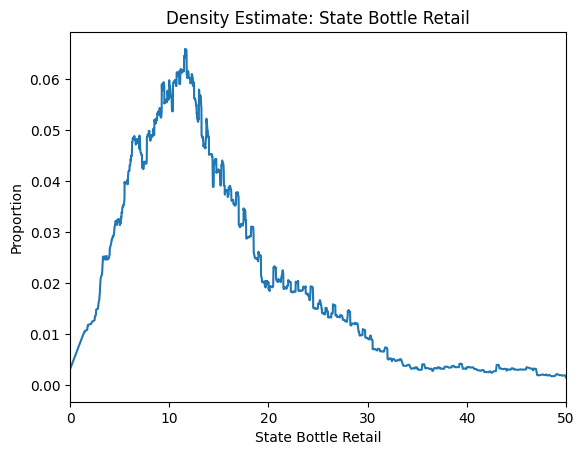

In [60]:
#class code
def kde(x, h): #where x is data and h is bandwidth
    Z = np.sort(x.unique()).reshape(1,-1) # Extract unique values for x
    data = x.to_numpy().reshape(-1,1) # Reshape the data
    I = np.abs( data-Z ) <= h # Compute the kernel
    kde = np.mean(I,axis=0)/(2*h) # Sum over x indices and normalize
    grid = Z.reshape(-1,1)

    # Plot KDE
    title_str = x.name
    plt.plot(grid,kde)
    plt.xlim(0,50)
    plt.title(f'Density Estimate: {title_str}')
    plt.ylabel('Proportion')
    plt.xlabel(title_str)
    return kde, grid

f_hat, grid = kde(x,2)

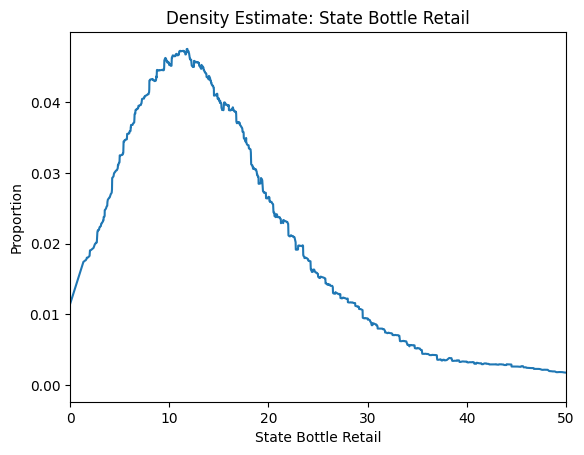

In [61]:
f_hat, grid = kde(x,7)

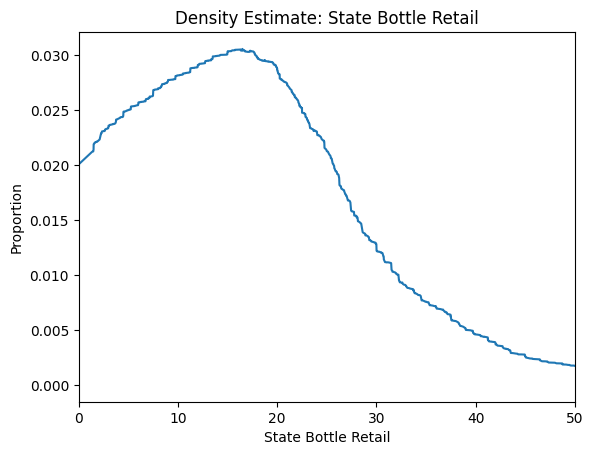

In [62]:
f_hat, grid = kde(x,15)

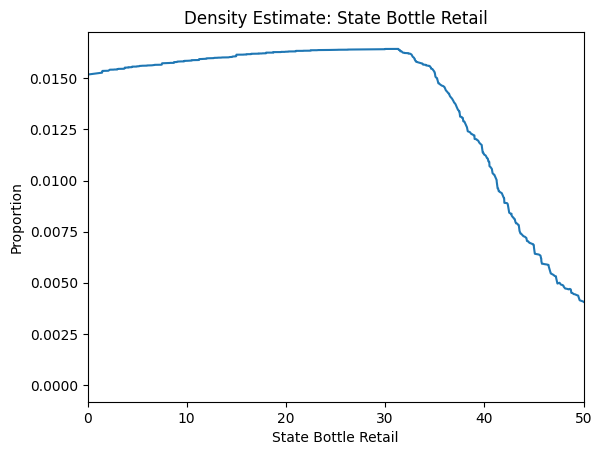

In [63]:
f_hat, grid = kde(x,30)

The kernal desnsity function overfits with a lower bandwidth and underfits with a higher bandwidth.